In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=stats&tid=18636&statsType=c'
response = requests.get(url).text
soup = BeautifulSoup(response)

In [3]:
headings = soup.find_all('div', attrs={"style":"display:inline-block; border:1px solid silver;text-align:center;width:2.5em;background-color:#05643A;color:#FFF;"})

In [4]:
headings_list = [i.get_text() for i in headings][:11]

In [5]:
headings_list

['HOL', 'RNK', 'PAR', 'YDG', 'AVG', 'EAG', 'BIR', 'PAR', 'BOG', 'DBL', 'OTH']

In [6]:
headings_list.insert(5, 'SC')

In [7]:
scores = soup.find_all('div', attrs={"style":"clear:both;;white-space:nowrap;"})

In [8]:
score_rows = [i.get_text() for i in scores]

In [9]:
score_list = [score.split('\n')[1:13] for score in score_rows]

In [11]:
df = pd.DataFrame(score_list, columns= headings_list)

In [12]:
df = df.astype(float)

In [14]:
!ls ../../../../Desktop/golfStats/RoyalLakes2019/

In [16]:
# df[:18].to_csv(path_or_buf='../../../../Desktop/golfStats/RoyalLakes2019/totRoundsRLtourny_2019.csv')

In [17]:
# df[18:36].to_csv(path_or_buf='../../../../Desktop/golfStats/RoyalLakes2019/RLtournyRd1_2019.csv')

In [18]:
# df[36:].to_csv(path_or_buf='../../../../Desktop/golfStats/RoyalLakes2019/RLtournyRd2_2019.csv')

In [19]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

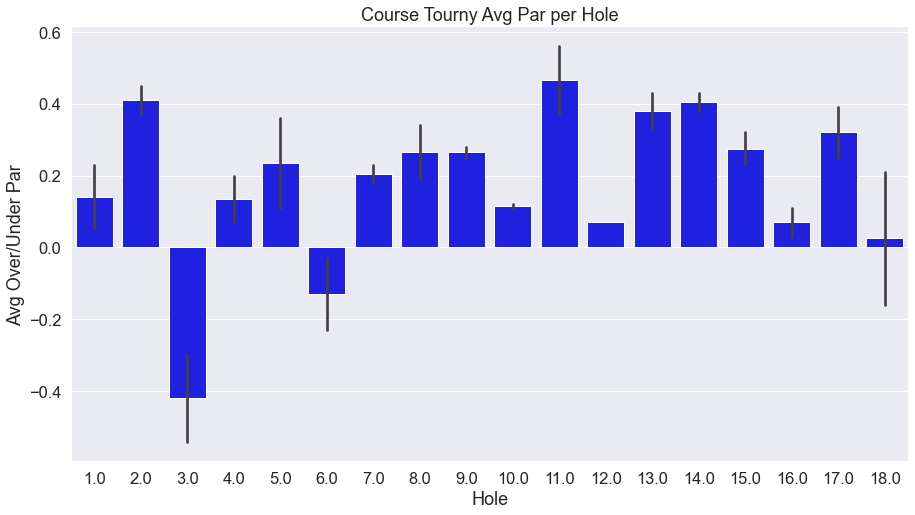

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x=df[18:].HOL , y=df[18:].SC, color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Course Tourny Avg Par per Hole');
# plt.savefig('../../../../Desktop/golfStats/RoyalLakes2019/RLtournyAvgPar_2019.png')

# Winning team stats round 1

In [23]:
from selenium import webdriver

In [24]:
import time

In [25]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/Users\dcv_2\Desktop\chromedriver_win32\chromedriver", options=options)
#"C:\Users\dcv_2\Desktop\chromedriver_win32\chromedriver.exe"

In [26]:
driver.get("https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=team&tid=18636")

In [27]:
time.sleep(1)
click_button = driver.find_element_by_link_text('Hampden-Sydney Coll.')
click_button.click()

time.sleep(3)
click_round1 = driver.find_element_by_link_text('1')
click_round1.click()

In [28]:
page_source = driver.page_source

In [29]:
sp = BeautifulSoup(page_source)

In [30]:
site = sp.find_all('div')

In [41]:
players = site[4].get_text().split('\n')[128:180]

In [42]:
values = []

In [43]:
for player in players:
    if player == "":
        continue
    else:
        values.append(player)

In [44]:
realValues = values[1:]

In [45]:
parHeadings = list(values[0])

In [47]:
indexes = [9, 10, 20,21,22,23]
for index in sorted(indexes, reverse=True):
    
    del parHeadings[index]

In [49]:
playerScores = [x for x in realValues if realValues.index(x) in [1,5,9,13,17,21]]

In [50]:
scoresList = []

In [51]:
for score in playerScores:
    scoresList.append(list(map(int, score)))

In [52]:
for score in scoresList:
    indexes = [9, 10, 20,21,22,23]
    for index in sorted(indexes, reverse=True):
        del score[index]

In [53]:
scoresList.append(parHeadings)

In [54]:
colNames = ['p1', 'p2', 'p3', 'p4', 'p5','p6', 'par']

In [55]:
playerDict = dict(zip(colNames, scoresList))

In [57]:
hampden = pd.DataFrame(playerDict)

In [58]:
hampden['hole'] = [i for i in range(1,19)]

In [59]:
hampden['par'] = hampden['par'].astype(int)

In [60]:
hampden['averagePar'] = hampden[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].sum(axis=1)/6

In [61]:
hampden['diff'] = hampden['averagePar'] - hampden['par']

In [66]:
first_column = hampden.pop('hole')
  
# insert column using insert(position,column_name,
# first_column) function
hampden.insert(0, 'hole', first_column)

In [67]:
#hampden.to_csv(path_or_buf='../../../../Desktop/golfStats/RoyalLakes2019/hampdenRd1.csv')

In [68]:
hampden

,hole,p1,p2,p3,p4,p5,p6,par,averagePar,diff
0,1,5,5,4,5,5,6,5,5.000000,0.000000
1,2,3,4,4,4,5,4,4,4.000000,0.000000
2,3,4,4,4,4,4,4,5,4.000000,-1.000000
3,4,3,3,4,2,3,3,3,3.000000,0.000000
4,5,4,4,3,3,4,6,4,4.000000,0.000000
5,6,4,4,3,4,3,4,4,3.666667,-0.333333
6,7,4,4,6,4,3,4,4,4.166667,0.166667
7,8,4,3,3,3,3,4,3,3.333333,0.333333
8,9,4,4,4,3,4,3,4,3.666667,-0.333333
9,10,4,4,3,4,5,4,4,4.000000,0.000000


# Winning team stats round 2

In [69]:
time.sleep(1)
click_button2 = driver.find_element_by_link_text('Hampden-Sydney Coll.')
click_button2.click()

time.sleep(3)
click_round2 = driver.find_element_by_link_text('2')
click_round2.click()

In [70]:
page_source2 = driver.page_source

In [71]:
sp2 = BeautifulSoup(page_source2)

In [72]:
site2 = sp2.find_all('div')

In [73]:
players2 = site2[4].get_text().split('\n')[128:180]

In [74]:
values2 = []

In [75]:
for player in players2:
    if player == "":
        continue
    else:
        values2.append(player)

In [76]:
realValues2 = values2[1:]

In [77]:
parHeadings2 = list(values2[0])

In [78]:
indexes2 = [9, 10, 20,21,22,23]
for index in sorted(indexes2, reverse=True):
    
    del parHeadings2[index]

In [79]:
playerScores2 = [x for x in realValues2 if realValues2.index(x) in [1,5,9,13,17,21]]

In [80]:
scoresList2 = []

In [81]:
for score in playerScores2:
    scoresList2.append(list(map(int, score)))

In [83]:
for score in scoresList2:
    indexes2 = [9, 10, 20,21,22,23]
    for index in sorted(indexes2, reverse=True):
        del score[index]

In [84]:
scoresList2.append(parHeadings)

In [85]:
colNames2 = ['p1', 'p2', 'p3', 'p4', 'p5','p6', 'par']

In [86]:
playerDict2 = dict(zip(colNames2, scoresList2))

In [87]:
pd.DataFrame(playerDict2)

,p1,p2,p3,p4,p5,p6,par
0,6,4,5,5,4,7,5
1,4,3,4,4,4,6,4
2,5,5,4,3,4,3,5
3,4,3,5,4,3,3,3
4,4,3,3,4,3,3,4
5,4,5,4,4,3,4,4
6,3,4,4,4,4,4,4
7,4,3,3,2,3,2,3
8,5,4,5,4,4,4,4
9,3,4,4,4,4,3,4


In [88]:
hampdenRd2 = pd.DataFrame(playerDict2)

In [89]:
hampdenRd2['hole'] = [i for i in range(1,19)]

In [90]:
hampdenRd2['par'] = hampdenRd2['par'].astype(int)

In [91]:
hampdenRd2['averagePar'] = hampdenRd2[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].sum(axis=1)/6

In [92]:
hampdenRd2['diff'] = hampdenRd2['averagePar'] - hampdenRd2['par']

In [93]:
first_column = hampdenRd2.pop('hole')
  
# insert column using insert(position,column_name,
# first_column) function
hampdenRd2.insert(0, 'hole', first_column)

In [94]:
# hampdenRd2.to_csv(path_or_buf='../../../../Desktop/golfStats/RoyalLakes2019/hampdenRd2.csv')

In [95]:
hampdenRd2

,hole,p1,p2,p3,p4,p5,p6,par,averagePar,diff
0,1,6,4,5,5,4,7,5,5.166667,0.166667
1,2,4,3,4,4,4,6,4,4.166667,0.166667
2,3,5,5,4,3,4,3,5,4.000000,-1.000000
3,4,4,3,5,4,3,3,3,3.666667,0.666667
4,5,4,3,3,4,3,3,4,3.333333,-0.666667
5,6,4,5,4,4,3,4,4,4.000000,0.000000
6,7,3,4,4,4,4,4,4,3.833333,-0.166667
7,8,4,3,3,2,3,2,3,2.833333,-0.166667
8,9,5,4,5,4,4,4,4,4.333333,0.333333
9,10,3,4,4,4,4,3,4,3.666667,-0.333333


# Averaging both rounds

In [97]:
hampden

,hole,p1,p2,p3,p4,p5,p6,par,averagePar,diff
0,1,5,5,4,5,5,6,5,5.000000,0.000000
1,2,3,4,4,4,5,4,4,4.000000,0.000000
2,3,4,4,4,4,4,4,5,4.000000,-1.000000
3,4,3,3,4,2,3,3,3,3.000000,0.000000
4,5,4,4,3,3,4,6,4,4.000000,0.000000
5,6,4,4,3,4,3,4,4,3.666667,-0.333333
6,7,4,4,6,4,3,4,4,4.166667,0.166667
7,8,4,3,3,3,3,4,3,3.333333,0.333333
8,9,4,4,4,3,4,3,4,3.666667,-0.333333
9,10,4,4,3,4,5,4,4,4.000000,0.000000


In [98]:
df = pd.concat([hampden, hampdenRd2])

In [99]:
df

,hole,p1,p2,p3,p4,p5,p6,par,averagePar,diff
0,1,5,5,4,5,5,6,5,5.000000,0.000000
1,2,3,4,4,4,5,4,4,4.000000,0.000000
2,3,4,4,4,4,4,4,5,4.000000,-1.000000
3,4,3,3,4,2,3,3,3,3.000000,0.000000
4,5,4,4,3,3,4,6,4,4.000000,0.000000
5,6,4,4,3,4,3,4,4,3.666667,-0.333333
6,7,4,4,6,4,3,4,4,4.166667,0.166667
7,8,4,3,3,3,3,4,3,3.333333,0.333333
8,9,4,4,4,3,4,3,4,3.666667,-0.333333
9,10,4,4,3,4,5,4,4,4.000000,0.000000


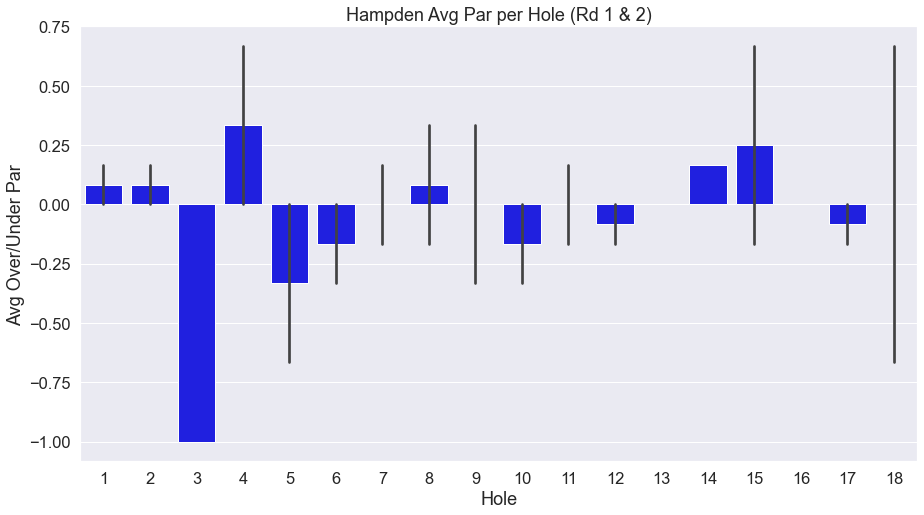

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['hole'] , y=df['diff'], color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Hampden Avg Par per Hole (Rd 1 & 2)');
# plt.savefig('../../../../Desktop/golfStats/RoyalLakes2019/hampdenAvgPar.png')

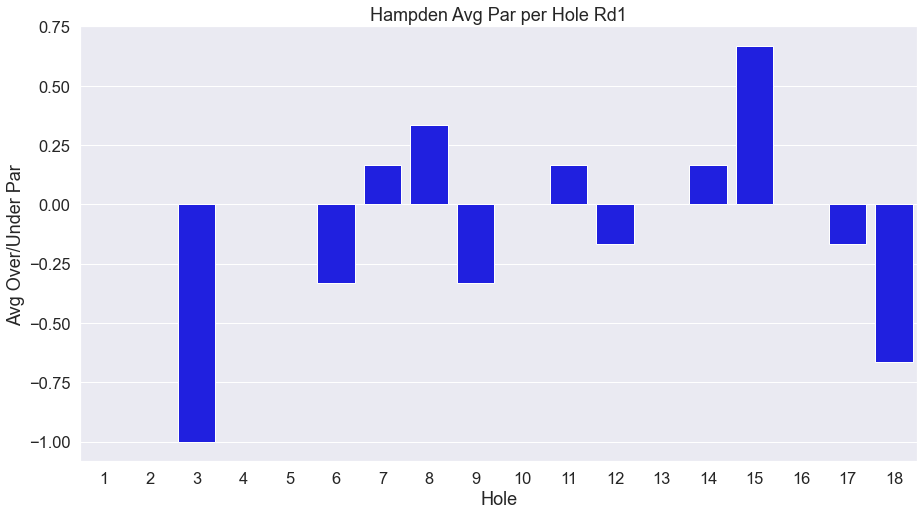

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(x=hampden['hole'] , y=hampden['diff'], color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Hampden Avg Par per Hole Rd1');
# plt.savefig('../../../../Desktop/golfStats/RoyalLakes2019/hampdenRd1.png')

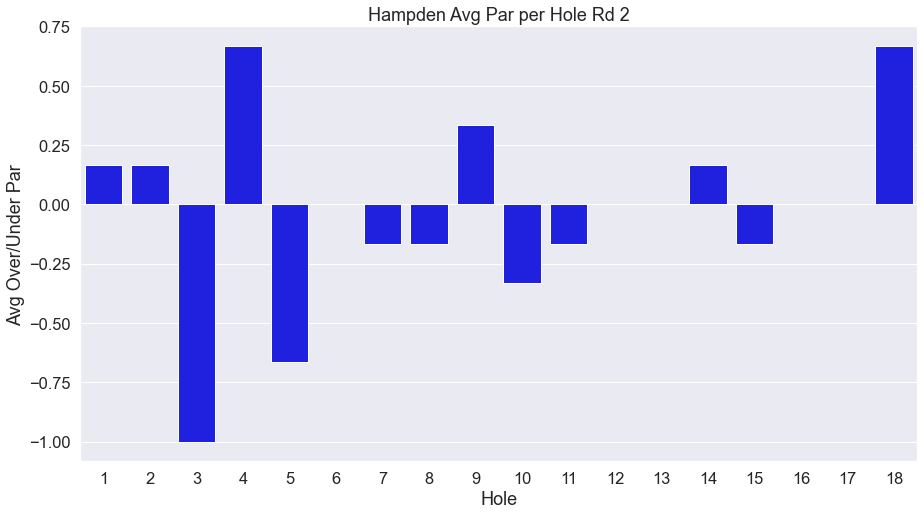

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x=hampdenRd2['hole'] , y=hampdenRd2['diff'], color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Hampden Avg Par per Hole Rd 2');
# plt.savefig('../../../../Desktop/golfStats/RoyalLakes2019/hampdenRd2.png')